# Miniproject: Transaction data

Время и сводные таблицы

### Задачи

1) Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

2) Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.

3) Сколько транзакций завершились ошибкой?

4) Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.

5) Коллега прислал Вам обновленные данные. Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.

6) Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.

7) Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.

### Описание данных

- date – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)
- name – имя пользователя
- transaction – статус транзакции
- minute* – сколько минут прошло с начала дня

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
trans = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-eremina/lesson_5/transaction_data_lesson_5.csv')

In [3]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         5315 non-null   object
 1   name         5315 non-null   object
 2   transaction  5315 non-null   object
dtypes: object(3)
memory usage: 124.7+ KB


In [4]:
trans.describe(include='all')

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:35:03,Masha_Ozerova,successfull
freq,6,112,3692


Сколько в датасете пропущенных значений?

In [6]:
trans.isna().sum().sum()

0

In [7]:
trans.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


Проверьте, какие значения принимает колонка transaction . Сколько наблюдений относятся к тому или иному уровню? 

Визуализируйте результат с помощью барплота.

In [8]:
trans_counts = trans.transaction.value_counts()

In [9]:
trans_counts

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

Text(0.5, 1.0, 'Распределение по типам транзакций\n')

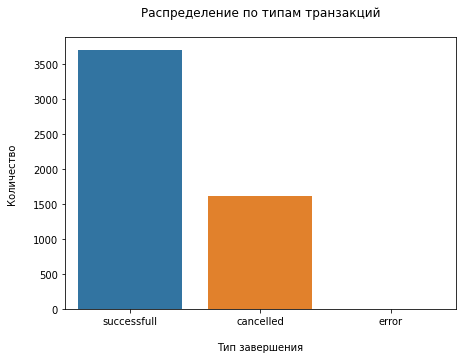

In [10]:
fix, ax = plt.subplots(figsize=(7,5))
sns.barplot(x = trans_counts.index, y = trans_counts.values, ax = ax)

ax.set_ylabel('Количество\n')
ax.set_xlabel('\nТип завершения')
ax.set_title('Распределение по типам транзакций\n')
# ax.bar_label(ax.containers[0]) # не во всех версиях matplotlib, подписывает количество сверху

Сколько произошло ошибок? 

In [11]:
trans_counts.error

4

Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull

Посмотрите на характеристики распределения, постройте гистограмму числа успешных транзакций, совершённых каждым пользователем
- по оси x – число транзакций
- по оси y – доля пользователей с таким числом транзакций

In [12]:
success_trans = trans.query('transaction == "successfull"') \
    .groupby('name', as_index = False) \
    .size()

In [13]:
success_trans.head()

,name,size
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68


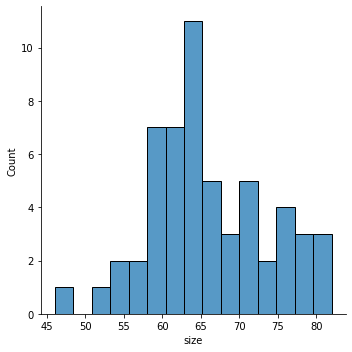

In [14]:
sns.displot(data=success_trans, x = 'size', bins = 15)

In [15]:
success_trans.describe()

,size
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


Постройте сводную таблицу user_vs_minute_pivot, где:
- столбцы – имена пользователей (columns)
- строки – минута времени осуществления операции (minute) (index)
- значения – число совершённых операций (values)

Пропущенные значения заполните нулями.

In [16]:
dff = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-eremina/lesson_5/transaction_data_updated.csv', parse_dates = ['date'])

In [17]:
df = dff.groupby(['name', 'minute'], as_index=False).size()

In [18]:
df.head()

,name,minute,size
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3


In [19]:
user_vs_minute_pivot = df.pivot(index='minute', columns = 'name', values = 'size').fillna(0)

In [20]:
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


In [21]:
user_vs_minute_pivot.sum(axis=1).head()

minute
0    111.0
1    145.0
2    123.0
3    129.0
4     92.0
dtype: float64

Посчитайте число минут, прошедших с начала дня. Результат сохраните в колонку true_minute. 

Постройте график barplot 

In [22]:
dff['date'] = pd.to_datetime(dff.date)

In [23]:
dff['true_minute'] = dff.date.dt.hour * 60 + dff.date.dt.minute

In [24]:
dff.head()

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17


<Figure size 1440x1152 with 0 Axes>

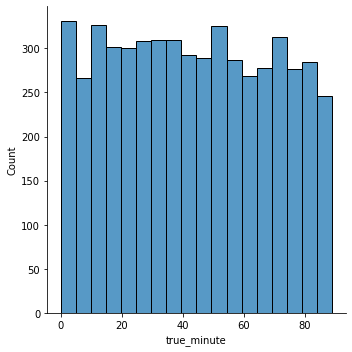

In [25]:
plt.figure(figsize=(20, 16))
sns.displot(x='true_minute', data = dff)